
Please click for project overview

[Online Retail Segmentation Project](https://github.com/mozkemah/Unsupervised-Learning-Capstone.git)

by Mehmet Ozkemah

Thinkful Data Science Flex Program

Sep 20

Ready to go?

Let's first set the environment and reach the data

In [ ]:
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
path= "/content/drive/My Drive/shopper.csv"

In [ ]:
segment_df = pd.read_csv(path, encoding = 'unicode_escape')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Let's have a look at what kind of data we have.

In [ ]:
segment_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,12/9/2011 9:27,2.08,16446.0,United Kingdom
1,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,1/18/2011 10:17,1.04,12346.0,United Kingdom
2,556690,23005,printing smudges/thrown away,-9600,6/14/2011 10:37,0.00,NaN,United Kingdom
3,556691,23005,printing smudges/thrown away,-9600,6/14/2011 10:37,0.00,NaN,United Kingdom
4,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,12/2/2010 14:23,0.03,15838.0,United Kingdom


In [ ]:
segment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
segment_df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
segment_df.count()

InvoiceNo      541909
StockCode      541909
Description    540455
Quantity       541909
InvoiceDate    541909
UnitPrice      541909
CustomerID     406829
Country        541909
dtype: int64

**MISSING VALUES**

Check how many null values in my dataset.

In [ ]:
segment_df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Not many missing values. Let's see as a percentage.

In [ ]:
missing_vals = (segment_df.isnull().sum()/len(segment_df)).sort_values(ascending=False)
missing_vals

CustomerID     0.249267
Description    0.002683
Country        0.000000
UnitPrice      0.000000
InvoiceDate    0.000000
Quantity       0.000000
StockCode      0.000000
InvoiceNo      0.000000
dtype: float64

Almost 25% of Customer ID is missing and I can't fill those missing values. For segmentation, those missing values in Customer ID is not necessarily information and I can delete it.

In [ ]:
segment_df.dropna(axis = 0, subset = ['CustomerID'], inplace = True)

In [ ]:
segment_df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

Now, I don't have any null values.

**Duplicate Entries**

I want to see how many duplicated entries I have and then remove them from my dataset.

In [ ]:
print('Duplicate data entries: {}'.format(segment_df.duplicated().sum()))
segment_df.drop_duplicates(inplace = True)

Duplicate data entries: 5225


In [ ]:
segment_df.nunique()

InvoiceNo      28052
StockCode       3684
Description     3896
Quantity         436
InvoiceDate    20460
UnitPrice        620
CustomerID      4372
Country           37
dtype: int64

**EXPLORATORY DATA ANALYSIS**

**Country**

In [ ]:
segment_df.Country.nunique()

37

37 different country in my dataset which means customers from 37 different countries.

In [ ]:
customer_per_country=segment_df[['Country','CustomerID']].drop_duplicates()
customer_per_country.groupby(['Country'])['CustomerID'].aggregate('count').reset_index().sort_values('CustomerID', ascending=False).head(10)

,Country,CustomerID
35,United Kingdom,3950
14,Germany,95
13,France,87
30,Spain,31
3,Belgium,25
32,Switzerland,21
26,Portugal,19
18,Italy,15
12,Finland,12
1,Austria,11


In terms of customer numbers, United Kingdom is leading the list. Let's see UK's percentage.

In [ ]:
segment_df.loc[segment_df.Country=="United Kingdom"].shape[0] / segment_df.shape[0] * 100

88.82580850788338

UK generated 88% of total business in terms of value count.

What about the Top10 countries?

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


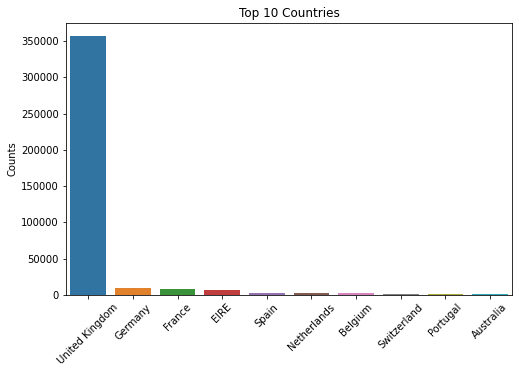

In [ ]:
country_numbers = segment_df.Country.value_counts().sort_values(ascending=False).iloc[0:20].head(10)
plt.figure(figsize=(8,5))
sns.barplot(country_numbers.index, country_numbers.values)
plt.ylabel("Counts")
plt.title("Top 10 Countries");
plt.xticks(rotation=45);


I saw some unspecified country entires in my dataset. Let's see how many I have.

In [ ]:
segment_df[segment_df["Country"] == "Unspecified"]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
85822,559929,22423,REGENCY CAKESTAND 3 TIER,1,7/14/2011 9:10,12.75,14265.0,Unspecified
90961,561658,47563A,RETRO LONGBOARD IRONING BOARD COVER,1,7/28/2011 16:06,1.25,12743.0,Unspecified
90962,561658,23124,18PC WOODEN CUTLERY SET DISPOSABLE,1,7/28/2011 16:06,1.25,12743.0,Unspecified
90963,561658,47574A,ENGLISH ROSE SCENTED HANGING FLOWER,1,7/28/2011 16:06,0.75,12743.0,Unspecified
90964,561658,84559A,3D SHEET OF DOG STICKERS,1,7/28/2011 16:06,0.85,12743.0,Unspecified
...,...,...,...,...,...,...,...,...
511760,559929,22709,WRAP WEDDING DAY,25,7/14/2011 9:10,0.42,14265.0,Unspecified
512048,561658,22046,TEA PARTY WRAPPING PAPER,25,7/28/2011 16:06,0.42,12743.0,Unspecified
512049,561658,23546,WRAP PAISLEY PARK,25,7/28/2011 16:06,0.42,12743.0,Unspecified
518770,557499,23119,PACK OF 6 LARGE FRUIT STRAWS,36,6/20/2011 15:25,0.62,16320.0,Unspecified


I have 241 entries that I know the source country.

**Quantity**

In [ ]:
segment_df.describe()

,Quantity,UnitPrice,CustomerID
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818
std,250.283037,69.764035,1714.006089
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


I have some negative values in Quantity column.It's most probably due to return orders.

In [ ]:
segment_df[(segment_df['Quantity']<0)].head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,12/9/2011 9:27,2.08,16446.0,United Kingdom
1,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,1/18/2011 10:17,1.04,12346.0,United Kingdom
4,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,12/2/2010 14:23,0.03,15838.0,United Kingdom
10,C550456,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,-3114,4/18/2011 13:08,2.10,15749.0,United Kingdom
20,C550456,21175,GIN + TONIC DIET METAL SIGN,-2000,4/18/2011 13:08,1.85,15749.0,United Kingdom
21,C550456,85123A,WHITE HANGING HEART T-LIGHT HOLDER,-1930,4/18/2011 13:08,2.55,15749.0,United Kingdom
26,C556522,22920,HERB MARKER BASIL,-1515,6/13/2011 11:21,0.55,16938.0,United Kingdom
39,C552995,M,Manual,-1350,5/12/2011 15:19,0.16,18133.0,United Kingdom
40,C550456,47566B,TEA TIME PARTY BUNTING,-1300,4/18/2011 13:08,2.55,15749.0,United Kingdom
43,C570556,20971,PINK BLUE FELT CRAFT TRINKET BOX,-1296,10/11/2011 11:10,1.06,16029.0,United Kingdom


There are some interesting findings here;

StockCode column have numeric, alphanumeric and non-numeric entries. It's bad.

Negative value entries have same type of InvoiceNo which starts with letter "C"



I want to see the number of returned order. For this, I will first create a new categorical column which have "Return" and "Order" values. "Return" column shows negative values, "Order" column shows normal orders.

In [ ]:
segment_df['Category']=segment_df['Quantity'].apply(lambda x: 'Return' if x<=0 else 'Order')

In [ ]:
segment_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Category
0,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,12/9/2011 9:27,2.08,16446.0,United Kingdom,Return
1,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,1/18/2011 10:17,1.04,12346.0,United Kingdom,Return
4,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,12/2/2010 14:23,0.03,15838.0,United Kingdom,Return
10,C550456,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,-3114,4/18/2011 13:08,2.10,15749.0,United Kingdom,Return
20,C550456,21175,GIN + TONIC DIET METAL SIGN,-2000,4/18/2011 13:08,1.85,15749.0,United Kingdom,Return


**InvoiceNo**

In [ ]:
segment_df.InvoiceNo.nunique()

28052

It looks like I have 28052 different trasaction in my dataset.

In [ ]:
invoice_no_group = segment_df.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate'].count()

In [ ]:
products_per_basket = invoice_no_group.rename(columns = {'InvoiceDate':'Number of products'})

In [ ]:
products_per_basket.InvoiceNo = products_per_basket.InvoiceNo.astype(str)
products_per_basket['cancelled_orders'] = products_per_basket['InvoiceNo'].apply(lambda x:int('C' in x))

In [ ]:
products_per_basket[products_per_basket["cancelled_orders"]==1]

,CustomerID,InvoiceNo,Number of products,cancelled_orders
1,12346.0,C541433,1,1
30,12352.0,C545329,2,1
31,12352.0,C545330,1,1
32,12352.0,C547388,7,1
52,12359.0,C549955,2,1
...,...,...,...,...
28009,18274.0,C577832,11,1
28011,18276.0,C577386,1,1
28012,18276.0,C577390,1,1
28014,18277.0,C542086,1,1


In [ ]:
print(len(products_per_basket[products_per_basket['cancelled_orders']==1]))
print(len(products_per_basket))

3654
28052


I have 3652 cancelled order out of total 28052 which means 13% 

**StockCode**

In [ ]:
segment_df.StockCode.nunique()

3684

I have 3684 different product in my dataset.

What are the common used StockCodes?


In [ ]:
no_order_per_stockcode = segment_df[['Quantity','StockCode']].groupby(['StockCode']).count()
no_order_per_stockcode = no_order_per_stockcode.reset_index(drop = False)
print (no_order_per_stockcode.sort_values(
    by='Quantity', ascending=False).rename(index=str,
                                        columns={"Quantity": "Number of product sold by StockCode"}))

     StockCode  Number of product sold by StockCode
3249    85123A                                 2065
1292     22423                                 1894
3235    85099B                                 1659
2599     47566                                 1409
3069     84879                                 1405
...        ...                                  ...
3574    90176B                                    1
3575    90176C                                    1
3456     90069                                    1
3409    90035C                                    1
2510     37461                                    1

[3684 rows x 2 columns]


Product with code '85123A' has the highest number of order:2065

Remember that we explored that StockCode column have numeric, alphanumeric and non-numeric entries.Let's see this non-numeric codes.

In [ ]:
non_numeric_codes = segment_df[segment_df['StockCode'].str.contains('^[a-zA-Z]+', regex=True)]['StockCode'].unique()
non_numeric_codes

array(['M', 'D', 'POST', 'C2', 'CRUK', 'BANK CHARGES', 'PADS', 'DOT'],
      dtype=object)

These non-numeric codes don't seem to be customer related codes. So it's better to drop these transactions from my database.

In [ ]:
segment_df = segment_df[segment_df['StockCode']!= 'POST']
segment_df = segment_df[segment_df['StockCode']!= 'D']
segment_df = segment_df[segment_df['StockCode']!= 'C2']
segment_df = segment_df[segment_df['StockCode']!= 'M']
segment_df = segment_df[segment_df['StockCode']!= 'BANK CHARGES']
segment_df = segment_df[segment_df['StockCode']!= 'PADS']
segment_df = segment_df[segment_df['StockCode']!= 'DOT']

Let's check it they were removed;

In [ ]:
segment_df[(segment_df['StockCode']=="POST")]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Category


**UnitPrice**

In [ ]:
segment_df.UnitPrice.describe()

count    399705.000000
mean          2.927189
std           5.875485
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max        1100.440000
Name: UnitPrice, dtype: float64

Mean is 2.92 and 50% value is 1.95. However max value is 1100. I also have some "0" values which doesn't make sense for UnitPrice. So I have to make this distribution better balanced.

Let's start with trying to find the reason of "0" values;

In [ ]:
segment_df[(segment_df['UnitPrice'] == 0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Category
13787,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,12/5/2010 14:02,0.0,12647.0,Germany,Order
29370,541109,22168,ORGANISER WOOD ANTIQUE WHITE,1,1/13/2011 15:10,0.0,15107.0,United Kingdom,Order
56917,550188,22636,CHILDS BREAKFAST SET CIRCUS PARADE,1,4/14/2011 18:57,0.0,12457.0,Switzerland,Order
90137,561284,22167,OVAL WALL MIRROR DIAMANTE,1,7/26/2011 12:24,0.0,16818.0,United Kingdom,Order
130094,574920,22899,CHILDREN'S APRON DOLLY GIRL,1,11/7/2011 16:34,0.0,13985.0,United Kingdom,Order
130095,574920,23480,MINI LIGHTS WOODLAND MUSHROOMS,1,11/7/2011 16:34,0.0,13985.0,United Kingdom,Order
181270,548871,22162,HEART GARLAND RUSTIC PADDED,2,4/4/2011 14:42,0.0,14410.0,United Kingdom,Order
215468,569716,22778,GLASS CLOCHE SMALL,2,10/6/2011 8:17,0.0,15804.0,United Kingdom,Order
225554,574879,22625,RED KITCHEN SCALES,2,11/7/2011 13:22,0.0,13014.0,United Kingdom,Order
230693,577314,23407,SET OF 2 TRAYS HOME SWEET HOME,2,11/18/2011 13:23,0.0,12444.0,Norway,Order


It's very difficult to have an idea why would be the reason of "0" value UnitPrice. I guess it is due to some discount. So let's drop them.

In [ ]:
segment_df = segment_df.loc[segment_df.UnitPrice > 0].copy()

Let's validate it;

In [ ]:
segment_df[(segment_df['UnitPrice'] == 0)].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Category


Let's check how many Unitprice we have higher than 100

In [ ]:
UnitPrice_higher100 = segment_df[(segment_df['UnitPrice'] > 100)]


In [ ]:
UnitPrice_higher100

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Category
5219,C542232,22655,VINTAGE RED KITCHEN CABINET,-2,1/26/2011 13:44,125.0,16714.0,United Kingdom,Return
5884,C562223,22655,VINTAGE RED KITCHEN CABINET,-2,8/3/2011 14:34,125.0,15804.0,United Kingdom,Return
6687,C539224,22656,VINTAGE BLUE KITCHEN CABINET,-1,12/16/2010 13:01,175.0,17377.0,United Kingdom,Return
6698,C539438,22655,VINTAGE RED KITCHEN CABINET,-1,12/17/2010 15:11,295.0,16607.0,United Kingdom,Return
6829,C540652,22655,VINTAGE RED KITCHEN CABINET,-1,1/10/2011 15:04,265.5,17406.0,United Kingdom,Return
...,...,...,...,...,...,...,...,...,...
229326,576635,22828,REGENCY MIRROR WITH SHUTTERS,2,11/16/2011 9:32,145.0,15269.0,United Kingdom,Order
245600,541789,22823,CHEST NATURAL WOOD 20 DRAWERS,3,1/21/2011 13:07,110.0,14088.0,United Kingdom,Order
281748,541426,22823,CHEST NATURAL WOOD 20 DRAWERS,4,1/18/2011 8:44,110.0,18233.0,United Kingdom,Order
311027,576512,22823,CHEST NATURAL WOOD 20 DRAWERS,4,11/15/2011 12:09,110.0,15524.0,United Kingdom,Order


I have only 144 rows out of almost half million rows. It's not so big and I can delete them to make the variable well balanced. 

**Let's do some more exploration**

How many product sold by transaction in descending order?

In [ ]:
new = segment_df.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate'].count()
product_per_basket = new.rename(columns = {'InvoiceDate':'Number_of_Products'})
product_per_basket.sort_values('Number_of_Products', ascending=False)

,CustomerID,InvoiceNo,Number_of_Products
7841,14096.0,576339,541
7843,14096.0,579196,532
7844,14096.0,580727,528
7842,14096.0,578270,441
7840,14096.0,575607,376
...,...,...,...
10956,14688.0,554637,1
10958,14688.0,566014,1
10961,14688.0,C542637,1
22875,17373.0,573398,1


In [ ]:
Invoice_no_counts = segment_df.InvoiceNo.value_counts().sort_values(ascending=False).iloc[0:10]

In [ ]:
Invoice_no_counts

576339    541
579196    532
580727    528
578270    441
575607    376
567183    342
570672    255
573576    238
547063    227
554098    221
Name: InvoiceNo, dtype: int64

In [ ]:
Invoice_no_counts.index = Invoice_no_counts.index

The highest amount of product sold in one transaction is 541. It's too much which means seller have a wide range of product and/or some of the buyers are wholesalers.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


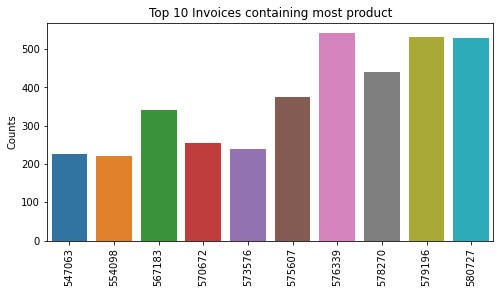

In [ ]:
plt.figure(figsize=(8,4))
sns.barplot(Invoice_no_counts.index, Invoice_no_counts.values)
plt.ylabel("Counts")
plt.title("Top 10 Invoices containing most product");
plt.xticks(rotation=90);

What are the most sold items in dataset?

In [ ]:
no_of_order_per_count = segment_df[['Quantity','Description']].groupby(['Description']).count()
no_of_order_per_count = no_of_order_per_count.reset_index(drop = False)
print (no_of_order_per_count.sort_values(
    by='Quantity', ascending=False).rename(index=str,
                                        columns={"Quantity": "Number of product sold"}))

                             Description  Number of product sold
3709  WHITE HANGING HEART T-LIGHT HOLDER                    2058
2773            REGENCY CAKESTAND 3 TIER                    1893
1767             JUMBO BAG RED RETROSPOT                    1659
2349                       PARTY BUNTING                    1408
217        ASSORTED COLOUR BIRD ORNAMENT                    1405
...                                  ...                     ...
1250   FLOWER FAIRY 5 SUMMER DRAW LINERS                       1
2476    PINK FLUFFY CHRISTMAS DECORATION                       1
2470             PINK FLOCK PHOTO FRAME                        1
2199          ORANGE FELT VASE + FLOWERS                       1
1856    LARGE ROUND CUTGLASS CANDLESTICK                       1

[3889 rows x 2 columns]


Here I can conclude that the most sold item is "White Hanging Heart T-Light Holder". Please see the image by clicking below link;

https://www.pinterest.com/pin/119978777546863593/

In [ ]:
description_counts = segment_df.Description.value_counts().sort_values(ascending=False).iloc[0:10]

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


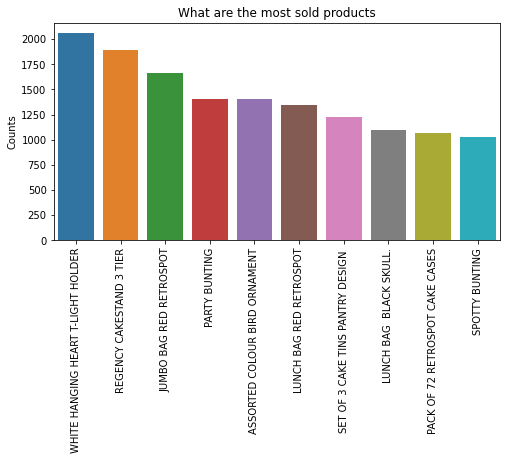

In [ ]:
plt.figure(figsize=(8,4))
sns.barplot(description_counts.index, description_counts.values)
plt.ylabel("Counts")
plt.title("What are the most sold products");
plt.xticks(rotation=90);

Let's check most common keywords in 'Description' with WorldCloud;

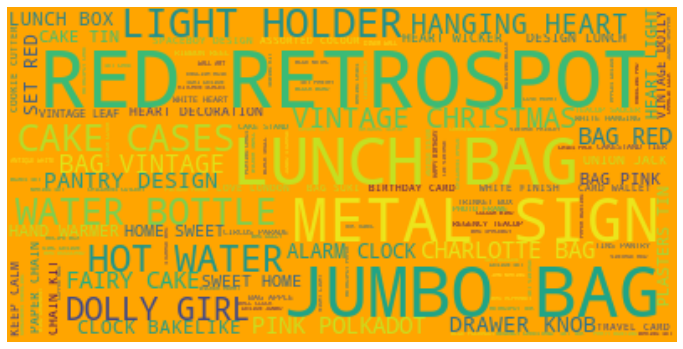

In [ ]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="orange").generate(" ".join(segment_df["Description"]))
plt.figure(figsize=(12,8))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

How many times did customers make an order? (How frequently they ordered?)

In [ ]:
no_order_per_customer = segment_df[['InvoiceNo','CustomerID']].groupby(['CustomerID']).count()
no_order_per_customer = no_order_per_customer.reset_index(drop = False)
print (no_order_per_customer.sort_values(
    by='InvoiceNo', ascending=False).rename(index=str,
                                        columns={"InvoiceNo": "Total number of order by Customer"}))

      CustomerID  Total number of order by Customer
4033     17841.0                               7800
1891     14911.0                               5806
1296     14096.0                               5111
328      12748.0                               4440
1670     14606.0                               2755
...          ...                                ...
3975     17752.0                                  1
3119     16579.0                                  1
1006     13703.0                                  1
601      13135.0                                  1
3632     17291.0                                  1

[4362 rows x 2 columns]


Customer with ID '17481' has the highest number of order with 7800 order. So we can say that this customer is the most loyal one.

In [ ]:
CustomerID_counts = segment_df.CustomerID.value_counts().sort_values(ascending=False).iloc[0:10]

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


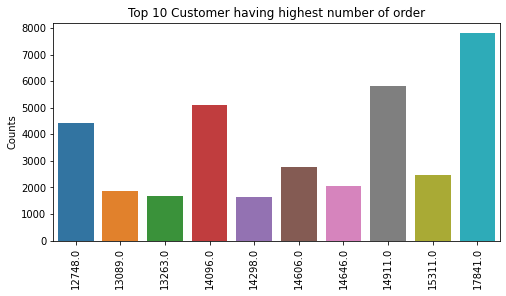

In [ ]:
plt.figure(figsize=(8,4))
sns.barplot(CustomerID_counts.index, CustomerID_counts.values)
plt.ylabel("Counts")
plt.title("Top 10 Customer having highest number of order");
plt.xticks(rotation=90);

Now I want to add new column which will show Order total of transaction.

In [ ]:
segment_df['OrderTotal'] = segment_df['Quantity'] * segment_df['UnitPrice']
segment_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Category,OrderTotal
0,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,12/9/2011 9:27,2.08,16446.0,United Kingdom,Return,-168469.60
1,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,1/18/2011 10:17,1.04,12346.0,United Kingdom,Return,-77183.60
4,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,12/2/2010 14:23,0.03,15838.0,United Kingdom,Return,-280.80
10,C550456,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,-3114,4/18/2011 13:08,2.10,15749.0,United Kingdom,Return,-6539.40
20,C550456,21175,GIN + TONIC DIET METAL SIGN,-2000,4/18/2011 13:08,1.85,15749.0,United Kingdom,Return,-3700.00
...,...,...,...,...,...,...,...,...,...,...
541901,544612,22053,EMPIRE DESIGN ROSETTE,3906,2/22/2011 10:43,0.82,18087.0,United Kingdom,Order,3202.92
541903,554868,22197,SMALL POPCORN HOLDER,4300,5/27/2011 10:52,0.72,13135.0,United Kingdom,Order,3096.00
541904,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,10/27/2011 12:26,0.21,12901.0,United Kingdom,Order,1008.00
541907,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/2011 10:01,1.04,12346.0,United Kingdom,Order,77183.60


I will add one more column to my dataset 'TotalNumberofOrder'  which shows total number of order per customer

In [ ]:
segment_df['TotalNbOfOrder'] = segment_df.groupby('CustomerID')['CustomerID'].transform('count')
segment_df


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Category,OrderTotal,TotalNbOfOrder
0,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,12/9/2011 9:27,2.08,16446.0,United Kingdom,Return,-168469.60,4
1,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,1/18/2011 10:17,1.04,12346.0,United Kingdom,Return,-77183.60,2
4,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,12/2/2010 14:23,0.03,15838.0,United Kingdom,Return,-280.80,168
10,C550456,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,-3114,4/18/2011 13:08,2.10,15749.0,United Kingdom,Return,-6539.40,15
20,C550456,21175,GIN + TONIC DIET METAL SIGN,-2000,4/18/2011 13:08,1.85,15749.0,United Kingdom,Return,-3700.00,15
...,...,...,...,...,...,...,...,...,...,...,...
541901,544612,22053,EMPIRE DESIGN ROSETTE,3906,2/22/2011 10:43,0.82,18087.0,United Kingdom,Order,3202.92,6
541903,554868,22197,SMALL POPCORN HOLDER,4300,5/27/2011 10:52,0.72,13135.0,United Kingdom,Order,3096.00,1
541904,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,10/27/2011 12:26,0.21,12901.0,United Kingdom,Order,1008.00,123
541907,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/2011 10:01,1.04,12346.0,United Kingdom,Order,77183.60,2


Let's check InvoiceDate;

In [ ]:
segment_df.InvoiceDate.dtype

dtype('O')

In [ ]:
segment_df['InvoiceDate'] = pd.to_datetime(segment_df.InvoiceDate, format='%m/%d/%Y %H:%M')

In [ ]:
segment_df.InvoiceDate.dtype

dtype('<M8[ns]')

How many days do we have in dataset?

In [ ]:
segment_df.InvoiceDate.max() - segment_df.InvoiceDate.min()

Timedelta('373 days 04:24:00')

**FEATURE ENGINEERING**

I will split InvoiceDate into some details to see if there is a different on e year, month or hour base?

In [ ]:
segment_df['Month'] = segment_df['InvoiceDate'].dt.month
segment_df['Day'] = segment_df['InvoiceDate'].dt.day
segment_df['Hour'] = segment_df['InvoiceDate'].dt.hour
segment_df['NbOfday'] = segment_df['InvoiceDate'].dt.weekday
segment_df['Weekday'] = segment_df['InvoiceDate'].dt.day_name()

In [ ]:
segment_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Category,OrderTotal,TotalNbOfOrder,Month,Day,Hour,NbOfday,Weekday
0,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom,Return,-168469.60,4,12,9,9,4,Friday
1,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom,Return,-77183.60,2,1,18,10,1,Tuesday
4,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2010-12-02 14:23:00,0.03,15838.0,United Kingdom,Return,-280.80,168,12,2,14,3,Thursday
10,C550456,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,-3114,2011-04-18 13:08:00,2.10,15749.0,United Kingdom,Return,-6539.40,15,4,18,13,0,Monday
20,C550456,21175,GIN + TONIC DIET METAL SIGN,-2000,2011-04-18 13:08:00,1.85,15749.0,United Kingdom,Return,-3700.00,15,4,18,13,0,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541901,544612,22053,EMPIRE DESIGN ROSETTE,3906,2011-02-22 10:43:00,0.82,18087.0,United Kingdom,Order,3202.92,6,2,22,10,1,Tuesday
541903,554868,22197,SMALL POPCORN HOLDER,4300,2011-05-27 10:52:00,0.72,13135.0,United Kingdom,Order,3096.00,1,5,27,10,4,Friday
541904,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,2011-10-27 12:26:00,0.21,12901.0,United Kingdom,Order,1008.00,123,10,27,12,3,Thursday
541907,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,Order,77183.60,2,1,18,10,1,Tuesday


I will create 'Weekend' and 'WeekDay' variables to differentiate the days

In [ ]:
segment_df['Weekend'] = np.where((segment_df['Weekday'] == 'Saturday') | (segment_df['Weekday'] == 'Sunday'), '1', '0')


In [ ]:
segment_df['WeekDay'] = np.where( ( ( (segment_df['Weekday'] == 'Monday') | (segment_df['Weekday'] == 'Tuesday') | (segment_df['Weekday'] == 'Wednesday') | (segment_df['Weekday'] == 'Thursday') | (segment_df['Weekday'] == 'Friday') ) ), '1', '0')


In [ ]:
segment_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Category,OrderTotal,TotalNbOfOrder,Month,Day,Hour,NbOfday,Weekday,Weekend,WeekDay
0,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom,Return,-168469.60,4,12,9,9,4,Friday,0,1
1,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom,Return,-77183.60,2,1,18,10,1,Tuesday,0,1
4,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2010-12-02 14:23:00,0.03,15838.0,United Kingdom,Return,-280.80,168,12,2,14,3,Thursday,0,1
10,C550456,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,-3114,2011-04-18 13:08:00,2.10,15749.0,United Kingdom,Return,-6539.40,15,4,18,13,0,Monday,0,1
20,C550456,21175,GIN + TONIC DIET METAL SIGN,-2000,2011-04-18 13:08:00,1.85,15749.0,United Kingdom,Return,-3700.00,15,4,18,13,0,Monday,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541901,544612,22053,EMPIRE DESIGN ROSETTE,3906,2011-02-22 10:43:00,0.82,18087.0,United Kingdom,Order,3202.92,6,2,22,10,1,Tuesday,0,1
541903,554868,22197,SMALL POPCORN HOLDER,4300,2011-05-27 10:52:00,0.72,13135.0,United Kingdom,Order,3096.00,1,5,27,10,4,Friday,0,1
541904,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,2011-10-27 12:26:00,0.21,12901.0,United Kingdom,Order,1008.00,123,10,27,12,3,Thursday,0,1
541907,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,Order,77183.60,2,1,18,10,1,Tuesday,0,1


Above, "0" shows weekdays and "1" shows weekend. 

Let's compare the Weekday and Weekend peformance of OrderTotal.

In [ ]:
count_table = pd.crosstab(segment_df["OrderTotal"].mean(), segment_df["Weekday"])
count_table

Weekday,Friday,Monday,Sunday,Thursday,Tuesday,Wednesday
row_0,,,,,,
20.660801,55165,65373,61530,81135,67054,69415


It's really weird that we don't have Saturday in the dataset and Sunday performance is one the lowest one among all. Let's validate this;

In [ ]:
segment_df["NbOfday"].value_counts()

3    81135
2    69415
1    67054
0    65373
6    61530
4    55165
Name: NbOfday, dtype: int64

Again, it's really weird that there is no entrance on Saturday.

What is the distribution of orders to months?

In [ ]:
segment_df['Month'].value_counts().sort_index()

1     21562
2     20040
3     27358
4     22874
5     28512
6     27448
7     27111
8     27297
9     40269
10    49713
11    63942
12    43546
Name: Month, dtype: int64

Let's plot this;

Text(0, 0.5, 'Months')

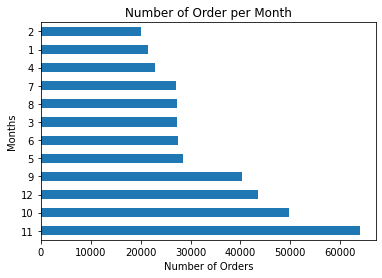

In [ ]:
segment_df.Month.value_counts().plot(kind="barh")
plt.title("Number of Order per Month")
plt.xlabel("Number of Orders")
plt.ylabel("Months")

Plot in month order this time;

Text(0, 0.5, 'Months')

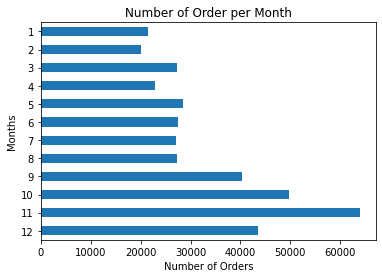

In [ ]:
segment_df.Month.value_counts().sort_index(ascending=False).plot(kind='barh')
plt.title("Number of Order per Month")
plt.xlabel("Number of Orders")
plt.ylabel("Months")

Let's see total value count for all month.

In [ ]:
month_value_count = segment_df["Month"].value_counts().sort_index().sum()
month_value_count

399672

Let's see value count for first 8 months

In [ ]:
first_8_month = segment_df.loc[segment_df['Month']<9] 


In [ ]:
first_8_month.Month.value_counts().sort_index().sum()

202202

Let's see value count for last 4 months

In [ ]:
last_4_month = segment_df.loc[segment_df['Month']>8]

In [ ]:
last_4_month.Month.value_counts().sort_index().sum()

197470

We can conclude that first 8 month performance and last 4 month performance are almost equal in terms of value count.(51% & 49%) This is most probably as end of year approachs, number of order increases due to holiday shopping season


What is the distribution of orders to days?

In [ ]:
segment_df['Day'].value_counts().sort_index()

1     13730
2     12163
3     10852
4     14840
5     16368
6     18567
7     15761
8     15952
9     12999
10    14256
11    13473
12    10728
13    14181
14    14324
15    11432
16    12689
17    14868
18    12996
19    10916
20    14618
21    13305
22    12393
23    14277
24    12180
25    11964
26     8771
27    12425
28    13522
29     8133
30    10051
31     6938
Name: Day, dtype: int64

In [ ]:
day_value_count = segment_df["Day"].value_counts().sort_index().sum()
day_value_count

399672

Now, I will split the months into 3 part consisting 10 days and explore & compare each part to other

In [ ]:
first_10_days = segment_df.loc[segment_df['Day']<11]

In [ ]:
first_10_days.Day.value_counts().sort_index().sum()

145488

In [ ]:
second_10_days = segment_df.loc[((segment_df['Day'] > 10) & (segment_df['Day'] < 21))]


In [ ]:
second_10_days.Day.value_counts().sort_index().sum()

130225

In [ ]:
last_10_days = segment_df.loc[segment_df['Day'] > 20]

In [ ]:
last_10_days.Day.value_counts().sort_index().sum()

123959

There is not big difference between first, mid and last 10 days of the month in terms of value count. But first 10 day is higher than other 2 groups.  

Text(0, 0.5, 'Days')

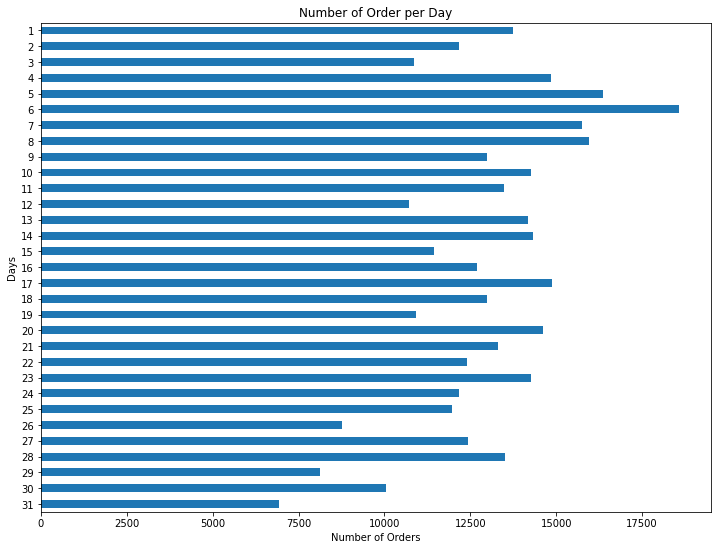

In [ ]:
segment_df.Day.value_counts().sort_index(ascending=False).plot(kind='barh', figsize=(12, 9))
plt.title("Number of Order per Day")
plt.xlabel("Number of Orders")
plt.ylabel("Days")


What is OrderTotal by Country?

Text(0.5, 1.0, 'Order Total by Country')

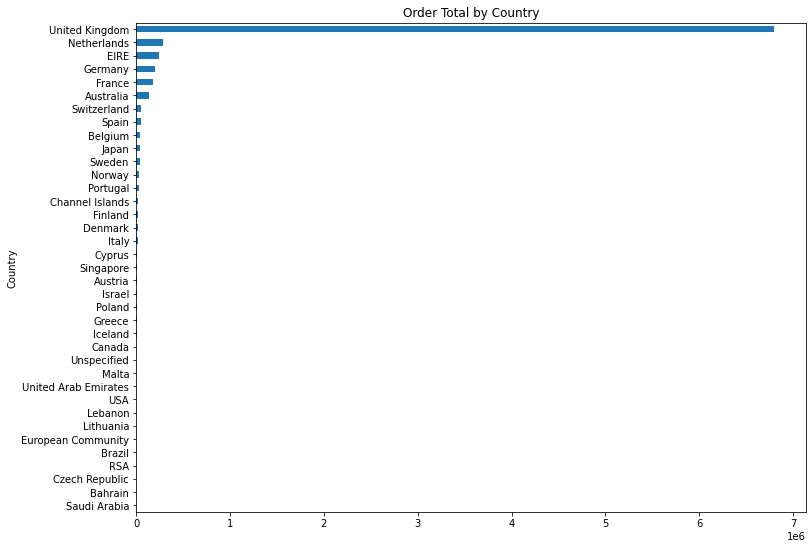

In [ ]:
ordartotal_by_country = segment_df.groupby(["Country"])["OrderTotal"].sum().sort_values()
ordartotal_by_country.plot(kind='barh', figsize=(12,9))
plt.title("Order Total by Country")

As the company based in the UK, the highest OrderTotal comes from the UK.

Text(0.5, 1.0, 'Invoices by Country')

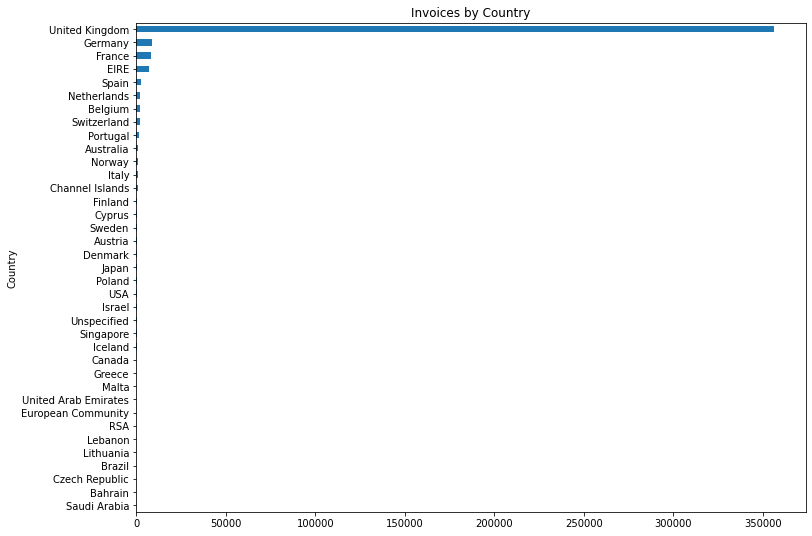

In [ ]:
invoice_by_country = segment_df.groupby(["Country"])["InvoiceNo"].count().sort_values()
invoice_by_country.plot(kind='barh', figsize=(12,9))
plt.title("Invoices by Country")

Again, UK is on top

In [ ]:
segment_df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Category,OrderTotal,TotalNbOfOrder,Month,Day,Hour,NbOfday,Weekday,Weekend,WeekDay
0,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom,Return,-168469.6,4,12,9,9,4,Friday,0,1
1,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom,Return,-77183.6,2,1,18,10,1,Tuesday,0,1
4,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2010-12-02 14:23:00,0.03,15838.0,United Kingdom,Return,-280.8,168,12,2,14,3,Thursday,0,1
10,C550456,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,-3114,2011-04-18 13:08:00,2.10,15749.0,United Kingdom,Return,-6539.4,15,4,18,13,0,Monday,0,1
20,C550456,21175,GIN + TONIC DIET METAL SIGN,-2000,2011-04-18 13:08:00,1.85,15749.0,United Kingdom,Return,-3700.0,15,4,18,13,0,Monday,0,1


Let's split day 4 groups & by 6 hours;

In [ ]:
segment_df['Hour1'] = np.where(segment_df['Hour']<=6, 1, 0)
segment_df['Hour2'] = np.where ( (segment_df['Hour'] > 6) & (segment_df['Hour'] <= 12 ), 1, 0)
segment_df['Hour3'] = np.where ( (segment_df['Hour'] > 12) & (segment_df['Hour'] <= 18 ), 1, 0)
segment_df['Hour4'] = np.where(segment_df['Hour'] > 18, 1, 0)

In [ ]:
segment_df['Day1'] = np.where(segment_df['Day'] <= 10, 1, 0)
segment_df['Day2'] = np.where ( (segment_df['Day'] > 10) & (segment_df['Day'] <= 20 ), 1, 0)
segment_df['Day3'] = np.where(segment_df['Day'] > 20, 1, 0)

Split the year into 4 quarter;

In [ ]:
segment_df['Quarter1'] = np.where(segment_df['Month']<=3, 1, 0)
segment_df['Quarter2'] = np.where ( (segment_df['Month'] > 3) & (segment_df['Month'] <= 6 ), 1, 0)
segment_df['Quarter3'] = np.where ( (segment_df['Month'] > 6) & (segment_df['Month'] <= 9 ), 1, 0)
segment_df['Quarter4'] = np.where(segment_df['Month'] > 9, 1, 0)

I have too much variables in my model. Some of the variables are not useful for modeling and it's better to remove them from the model.

In [ ]:
segment_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Category,OrderTotal,TotalNbOfOrder,Month,Day,Hour,NbOfday,Weekday,Weekend,WeekDay,Hour1,Hour2,Hour3,Hour4,Day1,Day2,Day3,Quarter1,Quarter2,Quarter3,Quarter4
0,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom,Return,-168469.60,4,12,9,9,4,Friday,0,1,0,1,0,0,1,0,0,0,0,0,1
1,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom,Return,-77183.60,2,1,18,10,1,Tuesday,0,1,0,1,0,0,0,1,0,1,0,0,0
4,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2010-12-02 14:23:00,0.03,15838.0,United Kingdom,Return,-280.80,168,12,2,14,3,Thursday,0,1,0,0,1,0,1,0,0,0,0,0,1
10,C550456,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,-3114,2011-04-18 13:08:00,2.10,15749.0,United Kingdom,Return,-6539.40,15,4,18,13,0,Monday,0,1,0,0,1,0,0,1,0,0,1,0,0
20,C550456,21175,GIN + TONIC DIET METAL SIGN,-2000,2011-04-18 13:08:00,1.85,15749.0,United Kingdom,Return,-3700.00,15,4,18,13,0,Monday,0,1,0,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541901,544612,22053,EMPIRE DESIGN ROSETTE,3906,2011-02-22 10:43:00,0.82,18087.0,United Kingdom,Order,3202.92,6,2,22,10,1,Tuesday,0,1,0,1,0,0,0,0,1,1,0,0,0
541903,554868,22197,SMALL POPCORN HOLDER,4300,2011-05-27 10:52:00,0.72,13135.0,United Kingdom,Order,3096.00,1,5,27,10,4,Friday,0,1,0,1,0,0,0,0,1,0,1,0,0
541904,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,2011-10-27 12:26:00,0.21,12901.0,United Kingdom,Order,1008.00,123,10,27,12,3,Thursday,0,1,0,1,0,0,0,0,1,0,0,0,1
541907,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,Order,77183.60,2,1,18,10,1,Tuesday,0,1,0,1,0,0,0,1,0,1,0,0,0


As I think they don't have any contribution to my model I will remove; 

InvoiceNo, StockCode, Description, CustomerID, Country from the model and will create final variables as follows;

In [ ]:
segment_df_final = segment_df.filter(["Quantity", "UnitPrice", "OrderTotal", "TotalNbOfOrder", "Category", "Quarter1", "Quarter2", "Quarter3", "Quarter4", "WeekDay", "Hour1", "Hour2", "Hour3", "Hour4", "Day1", "Day2", "Day3"], axis=1)

In [ ]:
segment_df_final

,Quantity,UnitPrice,OrderTotal,TotalNbOfOrder,Category,Quarter1,Quarter2,Quarter3,Quarter4,WeekDay,Hour1,Hour2,Hour3,Hour4,Day1,Day2,Day3
0,-80995,2.08,-168469.60,4,Return,0,0,0,1,1,0,1,0,0,1,0,0
1,-74215,1.04,-77183.60,2,Return,1,0,0,0,1,0,1,0,0,0,1,0
4,-9360,0.03,-280.80,168,Return,0,0,0,1,1,0,0,1,0,1,0,0
10,-3114,2.10,-6539.40,15,Return,0,1,0,0,1,0,0,1,0,0,1,0
20,-2000,1.85,-3700.00,15,Return,0,1,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541901,3906,0.82,3202.92,6,Order,1,0,0,0,1,0,1,0,0,0,0,1
541903,4300,0.72,3096.00,1,Order,0,1,0,0,1,0,1,0,0,0,0,1
541904,4800,0.21,1008.00,123,Order,0,0,0,1,1,0,1,0,0,0,0,1
541907,74215,1.04,77183.60,2,Order,1,0,0,0,1,0,1,0,0,0,1,0


We have only Category column which is non-numeric. Let's turn it into catgorical value as a binary

In [ ]:
segment_df_final['Category'] = np.where(segment_df_final['Category'] == "Order", 1, 0)

In [ ]:
segment_df_final

,Quantity,UnitPrice,OrderTotal,TotalNbOfOrder,Category,Quarter1,Quarter2,Quarter3,Quarter4,WeekDay,Hour1,Hour2,Hour3,Hour4,Day1,Day2,Day3
0,-80995,2.08,-168469.60,4,0,0,0,0,1,1,0,1,0,0,1,0,0
1,-74215,1.04,-77183.60,2,0,1,0,0,0,1,0,1,0,0,0,1,0
4,-9360,0.03,-280.80,168,0,0,0,0,1,1,0,0,1,0,1,0,0
10,-3114,2.10,-6539.40,15,0,0,1,0,0,1,0,0,1,0,0,1,0
20,-2000,1.85,-3700.00,15,0,0,1,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541901,3906,0.82,3202.92,6,1,1,0,0,0,1,0,1,0,0,0,0,1
541903,4300,0.72,3096.00,1,1,0,1,0,0,1,0,1,0,0,0,0,1
541904,4800,0.21,1008.00,123,1,0,0,0,1,1,0,1,0,0,0,0,1
541907,74215,1.04,77183.60,2,1,1,0,0,0,1,0,1,0,0,0,1,0


**Detection and Handling of Outliers**

Let's first see how balanced are my variables

In [ ]:
segment_df_final.quantile(q=0.5, axis=0, numeric_only=True, interpolation='linear')
segment_df_final.quantile([.1, .25, .5, .75], axis = 0) 

,Quantity,UnitPrice,OrderTotal,TotalNbOfOrder,Category,Quarter1,Quarter2,Quarter3,Quarter4,Hour1,Hour2,Hour3,Hour4,Day1,Day2,Day3
0.10,1.0,0.55,1.65,41.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.25,2.0,1.25,4.25,90.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.50,5.0,1.95,11.56,201.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
0.75,12.0,3.75,19.50,451.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


Let's plot core variables to see if we have any outliers

[Text(0.5, 0, 'Core Variables')]

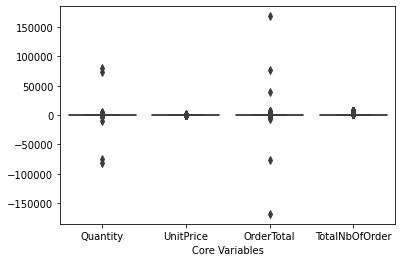

In [ ]:
box_plot=sns.boxplot(data=segment_df_final.iloc[:, 0:4])
box_plot.set(xlabel='Core Variables')

Quantity and OrderTotal have some outliers

Let's check Quantity first;I want to see bottom and top outliers and remove them from the model. For this, I describe percentile boundaries as 0.05 for bottom and 99.5 for top.

In [ ]:
np.percentile(segment_df_final["Quantity"], [0.05, 99.5])

array([-100.,  200.])

Now I will apply threshold method to remove the outliers from my model.

In [ ]:
threshold = -100
segment_df_final = segment_df_final[segment_df_final["Quantity"]>threshold] 


In [ ]:
threshold = 200
segment_df_final = segment_df_final[segment_df_final["Quantity"]<threshold]

Text(0.5, 1.0, 'Plot Of Quantity')

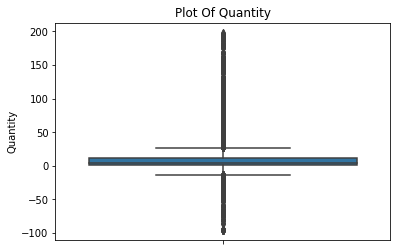

In [ ]:
ax=sns.boxplot(y=segment_df_final["Quantity"])
ax.set_title("Plot Of Quantity")

Looks like there is no outliers for Quantity

Let's do the same for OrderTotal

In [ ]:
np.percentile(segment_df_final["OrderTotal"], [0.05, 99.5])

array([-96.11013, 217.5    ])

In [ ]:
threshold = -96.11013
segment_df_final = segment_df_final[segment_df_final["OrderTotal"]>threshold] 


In [ ]:
threshold = 217.5
segment_df_final = segment_df_final[segment_df_final["OrderTotal"]<threshold]

Text(0.5, 1.0, 'Plot Of OrderTotal')

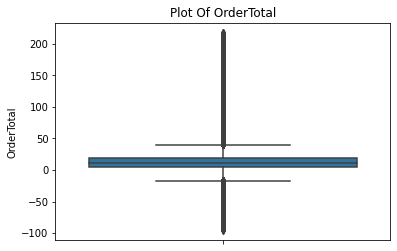

In [ ]:
ax=sns.boxplot(y=segment_df_final["OrderTotal"])
ax.set_title("Plot Of OrderTotal")

There is no more outliers for OrderTotal

I want to see last situation;

[Text(0.5, 0, 'Core Variables')]

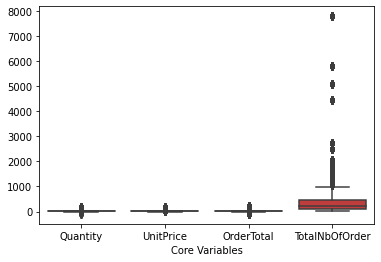

In [ ]:
box_plot=sns.boxplot(data=segment_df_final.iloc[:, 0:4])
box_plot.set(xlabel='Core Variables')

Hmm, maybe TotalNbOfOrder needs some correction. Let's do the same for TotalNbOfOrder;

In [ ]:
np.percentile(segment_df_final["TotalNbOfOrder"], [0.5, 99.5])

array([   8., 7800.])

This time I will only apply threshold for top outliers, as there is not too much outlier at the bottom. Cheking the plot, it's better to take 4000 as a threshold.

In [ ]:
threshold = 4000
segment_df_final = segment_df_final[segment_df_final["TotalNbOfOrder"]<threshold] 


Text(0.5, 1.0, 'Plot Of TotalNbOfOrder')

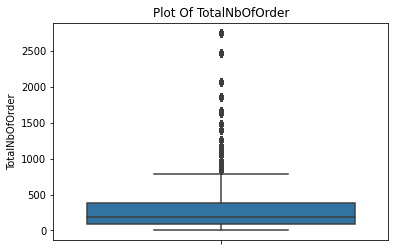

In [ ]:
ax=sns.boxplot(y=segment_df_final["TotalNbOfOrder"])
ax.set_title("Plot Of TotalNbOfOrder")

Let's check again last situation;

[Text(0.5, 17.200000000000003, 'Core Variables')]

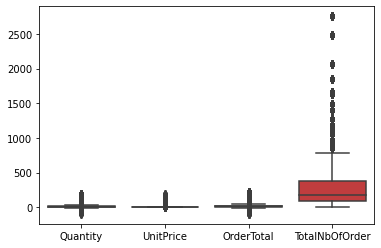

In [ ]:
boxplot=sns.boxplot(data=segment_df_final.iloc[:, 0:4])
box_plot.set(xlabel='Core Variables')

Looks fine, I can move with that.

Let's check the histogram of core variables

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0054b53be0>,
      dtype=object)

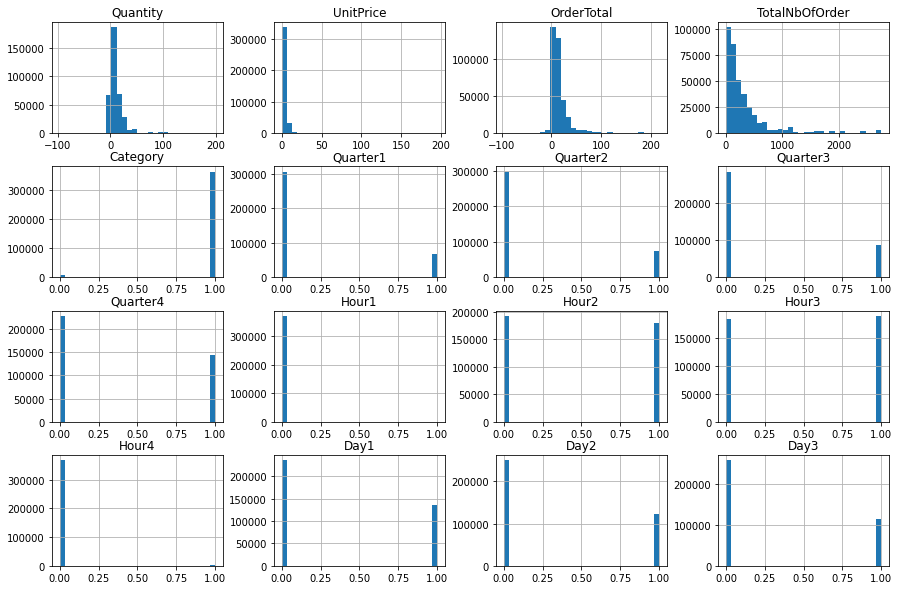

In [ ]:
segment_df_final.hist(bins=30, figsize=(15, 10))

TotalNbOfORder has exponential distribution without any minus value. Let's check if it has "0" value. ( "0" value may create a problem for log transformation) If not we can use np.log transformation method for this

In [ ]:
segment_df_final.TotalNbOfOrder.min()

1

Least value is "1". So I can apply log transformation

Text(0.5, 1.0, 'Histogram of log transformed TotalNbOfOrder')

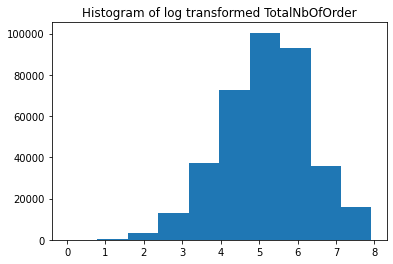

In [ ]:
plt.hist(np.log(segment_df_final["TotalNbOfOrder"]))
plt.title("Histogram of log transformed TotalNbOfOrder")

After Log transformation it is much more closer to normal distribution

Let's include this new log transformed form of TotalNbOfOrder to my dataset.

In [ ]:
segment_df_final["TotalNbOfOrderLogT"] = np.log(segment_df_final['TotalNbOfOrder'])
segment_df_final                 

,Quantity,UnitPrice,OrderTotal,TotalNbOfOrder,Category,Quarter1,Quarter2,Quarter3,Quarter4,WeekDay,Hour1,Hour2,Hour3,Hour4,Day1,Day2,Day3,TotalNbOfOrderLogT
529,-96,0.72,-69.12,14,0,0,1,0,0,1,0,0,1,0,0,1,0,2.639057
531,-96,0.11,-10.56,123,0,0,1,0,0,1,0,1,0,0,0,0,1,4.812184
537,-96,0.85,-81.60,6,0,0,0,1,0,1,0,0,1,0,0,1,0,1.791759
538,-96,0.85,-81.60,6,0,0,0,1,0,1,0,0,1,0,0,1,0,1.791759
539,-96,0.85,-81.60,6,0,0,0,1,0,1,0,0,1,0,0,1,0,1.791759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539665,192,0.72,138.24,492,1,0,0,0,1,1,0,0,1,0,1,0,0,6.198479
539666,192,0.69,132.48,280,1,0,0,0,1,1,0,0,1,0,1,0,0,5.634790
539668,192,0.79,151.68,34,1,0,0,0,1,1,0,0,1,0,1,0,0,3.526361
539669,192,1.06,203.52,420,1,0,0,0,1,1,0,1,0,0,1,0,0,6.040255


And of course remove the previous form of TotalNbOfOrder from the model.

In [ ]:
segment_df_final.drop(["TotalNbOfOrder"], axis=1, inplace=True) 


In [ ]:
segment_df_final

,Quantity,UnitPrice,OrderTotal,Category,Quarter1,Quarter2,Quarter3,Quarter4,WeekDay,Hour1,Hour2,Hour3,Hour4,Day1,Day2,Day3,TotalNbOfOrderLogT
529,-96,0.72,-69.12,0,0,1,0,0,1,0,0,1,0,0,1,0,2.639057
531,-96,0.11,-10.56,0,0,1,0,0,1,0,1,0,0,0,0,1,4.812184
537,-96,0.85,-81.60,0,0,0,1,0,1,0,0,1,0,0,1,0,1.791759
538,-96,0.85,-81.60,0,0,0,1,0,1,0,0,1,0,0,1,0,1.791759
539,-96,0.85,-81.60,0,0,0,1,0,1,0,0,1,0,0,1,0,1.791759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539665,192,0.72,138.24,1,0,0,0,1,1,0,0,1,0,1,0,0,6.198479
539666,192,0.69,132.48,1,0,0,0,1,1,0,0,1,0,1,0,0,5.634790
539668,192,0.79,151.68,1,0,0,0,1,1,0,0,1,0,1,0,0,3.526361
539669,192,1.06,203.52,1,0,0,0,1,1,0,1,0,0,1,0,0,6.040255


Now I can move to Modeling

**MODELING**

As I have a very large dataset, I will take 10000 random sample 
for the sake of memory usage and timing. I think 10000 would be enough for reliable modeling.

In [ ]:
segment_df_final.sample(n = 10000) 

,Quantity,UnitPrice,OrderTotal,Category,Quarter1,Quarter2,Quarter3,Quarter4,WeekDay,Hour1,Hour2,Hour3,Hour4,Day1,Day2,Day3,TotalNbOfOrderLogT
376406,8,3.75,30.00,1,0,1,0,0,1,0,0,1,0,0,1,0,5.988961
322671,5,1.65,8.25,1,0,0,1,0,1,0,0,1,0,0,1,0,6.343880
263718,3,4.25,12.75,1,0,0,1,0,1,0,0,1,0,0,1,0,5.438079
333779,6,1.65,9.90,1,1,0,0,0,1,0,1,0,0,1,0,0,5.723585
365734,6,3.75,22.50,1,0,0,0,1,1,0,0,1,0,0,0,1,5.030438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398421,10,0.85,8.50,1,0,0,1,0,1,0,0,1,0,0,0,1,5.834811
478031,18,1.25,22.50,1,1,0,0,0,1,0,1,0,0,1,0,0,3.091042
379381,8,0.85,6.80,1,0,0,1,0,1,0,0,1,0,0,1,0,5.823046
272878,3,1.25,3.75,1,0,0,0,1,1,0,0,1,0,0,1,0,3.610918


I want to take TotalNbOfOrderLogT column to front

In [ ]:
segment_df_final.insert(3,'TotalNbOfOrderLogT', segment_df_final.pop("TotalNbOfOrderLogT"))

In [ ]:
 X = segment_df_final.sample(n = 10000) 


In [ ]:
# Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [ ]:
# Reduce dimensionality and apply PCA;
X_pca = PCA(2).fit_transform(X_std)

**K-Means Clustering**

In [ ]:
# Calculate predicted values;
y_pred = KMeans(n_clusters=4, random_state=123).fit_predict(X_pca)

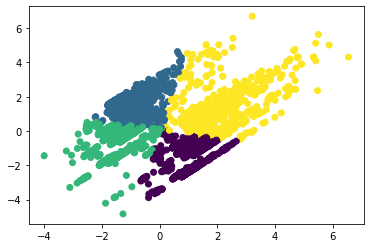

In [ ]:
# Plot the data;
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()


Kmeans reveals 4 cluster

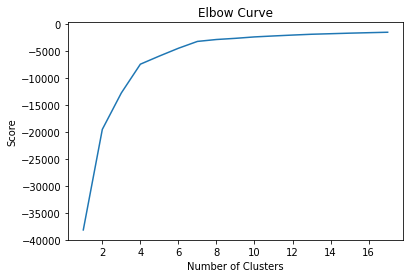

In [ ]:
Nc = range(1, 18)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(X_pca).score(X_pca) for i in range(len(kmeans))]
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

Elbow curve shows that 4 cluster is the best choice.

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(X_pca)

In [ ]:
X['cluster'] = kmeans.labels_

Let's see each cluster's mean

In [ ]:
X.groupby("cluster").mean()

,Quantity,UnitPrice,OrderTotal,TotalNbOfOrderLogT,Category,Quarter1,Quarter2,Quarter3,Quarter4,Hour1,Hour2,Hour3,Hour4,Day1,Day2,Day3
cluster,,,,,,,,,,,,,,,,
0,5.779032,2.830229,10.320328,5.226541,0.956680,0.107390,0.114307,0.092829,0.685475,0.0,0.002548,0.981798,0.015653,0.615217,0.219876,0.164907
1,17.737898,3.145155,29.143716,5.206011,0.998256,0.283471,0.289141,0.371130,0.056258,0.0,0.965983,0.031836,0.002181,0.066289,0.478849,0.454863
2,10.093494,3.210034,17.500009,5.129028,0.997846,0.263679,0.280052,0.395950,0.060319,0.0,0.000000,0.992245,0.007755,0.042654,0.463162,0.494184
3,7.409246,2.802027,12.462611,5.147729,0.974612,0.107995,0.138689,0.107995,0.645320,0.0,0.983327,0.000000,0.016673,0.652141,0.211065,0.136794


And let's see how many customer in each cluster

In [ ]:
X.groupby("cluster").count()

,Quantity,UnitPrice,OrderTotal,TotalNbOfOrderLogT,Category,Quarter1,Quarter2,Quarter3,Quarter4,WeekDay,Hour1,Hour2,Hour3,Hour4,Day1,Day2,Day3
cluster,,,,,,,,,,,,,,,,,
0,2747,2747,2747,2747,2747,2747,2747,2747,2747,2747,2747,2747,2747,2747,2747,2747,2747
1,2293,2293,2293,2293,2293,2293,2293,2293,2293,2293,2293,2293,2293,2293,2293,2293,2293
2,2321,2321,2321,2321,2321,2321,2321,2321,2321,2321,2321,2321,2321,2321,2321,2321,2321
3,2639,2639,2639,2639,2639,2639,2639,2639,2639,2639,2639,2639,2639,2639,2639,2639,2639


In [ ]:
X[X.cluster == 1].head(10)

,Quantity,UnitPrice,OrderTotal,TotalNbOfOrderLogT,Category,Quarter1,Quarter2,Quarter3,Quarter4,WeekDay,Hour1,Hour2,Hour3,Hour4,Day1,Day2,Day3,cluster
251517,3,5.95,17.85,5.579730,1,0,1,0,0,1,0,1,0,0,0,1,0,1
511080,25,0.42,10.50,4.290459,1,0,1,0,0,1,0,1,0,0,0,1,0,1
474278,16,4.25,68.00,3.828641,1,0,1,0,0,1,0,1,0,0,0,1,0,1
96075,1,12.75,12.75,7.921173,1,0,0,1,0,1,0,1,0,0,0,1,0,1
532369,72,0.19,13.68,7.402452,1,0,0,0,1,1,0,1,0,0,0,1,0,1
288054,4,4.95,19.80,7.301822,1,0,1,0,0,1,0,1,0,0,0,1,0,1
395668,10,2.08,20.80,6.111467,1,0,1,0,0,1,0,1,0,0,0,1,0,1
523379,48,3.39,162.72,3.761200,1,1,0,0,0,1,0,1,0,0,0,1,0,1
247423,3,2.10,6.30,7.815207,1,1,0,0,0,1,0,1,0,0,0,1,0,1
212120,2,7.95,15.90,3.295837,1,0,0,1,0,1,0,1,0,0,0,0,1,1


To check how many return and non-return order in our category variable;

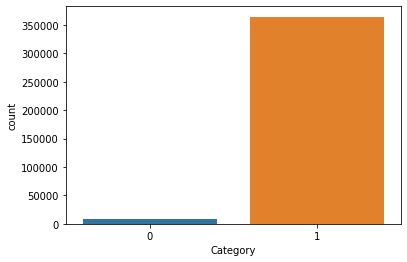

In [ ]:
sns.countplot(x="Category", data=segment_df_final)

Let's compare the clusters in terms of each core variables;

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Quantity Clustering Plot')

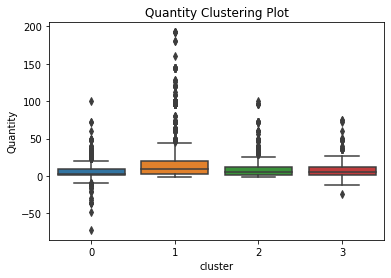

In [ ]:
ax=sns.boxplot(X.cluster,X.Quantity)
ax.set_title("Quantity Clustering Plot")


In terms of Quantity; 

Cluster 0 have some minus quantities. So we can conclude that return orders placed in this cluster.

Cluster 1 have the highest number of Quantities.

Cluster 2 and 3 are very close to each other and having no differentiation point 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'UnitPrice Clustering Plot')

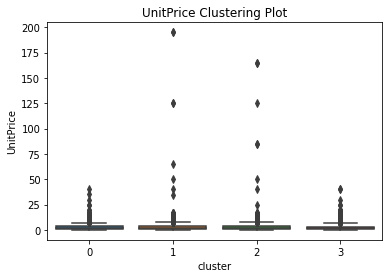

In [ ]:
ax=sns.boxplot(X.cluster, X.UnitPrice)
ax.set_title("UnitPrice Clustering Plot")

In terms of UnitPrice; Clusters are pretty close to each other. 

Cluster 1 and Cluster 3 have some higher values

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'OrderTotal Clustering Plot')

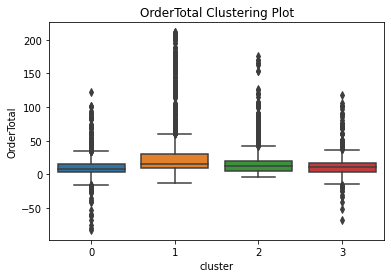

In [ ]:
ax=sns.boxplot(X.cluster, X.OrderTotal)
ax.set_title("OrderTotal Clustering Plot")

In terms of OrderTotal; Cluster 0 again have some minus values whic implies return orders.

Cluster 1 have slightly higher values then cluster 2 and 3 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'TotalNbOfOrderLogT Clustering Plot')

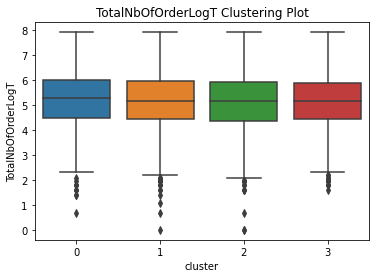

In [ ]:
ax=sns.boxplot(X.cluster,X.TotalNbOfOrderLogT)
ax.set_title("TotalNbOfOrderLogT Clustering Plot")

According to these reuslts;

Top Cluster is Cluster 1 (having with highest mean for each core variables)

It's followed by Cluster 2 and Cluster 0

Cluster 3 is at the bottom.

Distribution of the number of customers to each segment is well balanced. 

In terms of TotalNbOfOrder, there is no meaningful difference between clusters.

In [ ]:
import sklearn.metrics as metrics

In [ ]:
pred_3 = KMeans(n_clusters=3, random_state=123).fit_predict(X_pca)
print("Silhouette score for three cluster k-means: {}".format(
    metrics.silhouette_score(X_pca, pred_3, metric='euclidean')))

pred_4 = KMeans(n_clusters=4, random_state=123).fit_predict(X_pca)
print("Silhouette score for four cluster k-means: {}".format(
    metrics.silhouette_score(X_pca, pred_4, metric='euclidean')))

pred_5 = KMeans(n_clusters=5, random_state=123).fit_predict(X_pca)
print("Silhouette score for five cluster k-means: {}".format(
    metrics.silhouette_score(X_pca, pred_5, metric='euclidean')))

Silhouette score for three cluster k-means: 0.5124785575399092
Silhouette score for four cluster k-means: 0.5473483855083843
Silhouette score for five cluster k-means: 0.5606081368583118


Although it's not very decisive, three, four and five cluster scores are very close to each other. But none of them are high enough to make a decision by itself or to say that algorithm is working well.

We shouldn't forget that we are evaluating this based on the first two principal components from PCA rather than the four-dimensional data actually used by k-means. So the information value of these plots depends on how much information is retained by the PCA. Please remember that we should always look for other measures to determine the consistency of the clustering algorithms.

**Hierarchical Clustering**

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn import datasets, metrics
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
linkage_methods = ["ward", "average", "complete"]

# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage="ward", 
                                      affinity='euclidean',
                                      n_clusters=4)

# Fit model
clusters = agg_cluster.fit_predict(X_pca)

print("Silhouette score of linkage method ward: {}".format(
    metrics.silhouette_score(X_pca, clusters, metric='euclidean')))
print("------------------------------------------------")

# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage="average", 
                                      affinity='euclidean',
                                      n_clusters=4)

# Fit model
clusters = agg_cluster.fit_predict(X_pca)

print("Silhouette score of linkage method average: {}".format(
    metrics.silhouette_score(X_pca, clusters, metric='euclidean')))
print("------------------------------------------------")

# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage="complete", 
                                      affinity='euclidean',
                                      n_clusters=4)
# Fit model
clusters = agg_cluster.fit_predict(X_pca)

print("Silhouette score of linkage method complete: {}".format(
    metrics.silhouette_score(X_pca, clusters, metric='euclidean')))

Silhouette score of linkage method ward: 0.5349291749465553
------------------------------------------------
Silhouette score of linkage method average: 0.31629970534068863
------------------------------------------------
Silhouette score of linkage method complete: 0.18984146312362243


Let's validate it by dendrogram

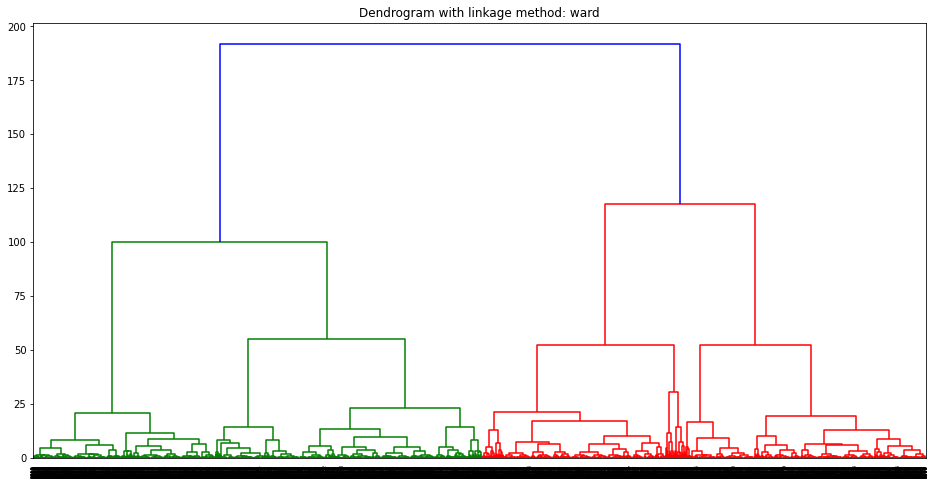

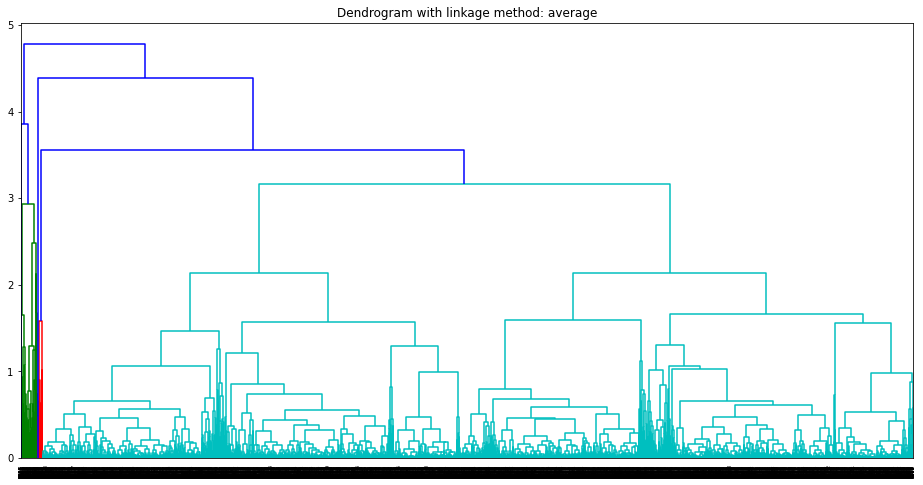

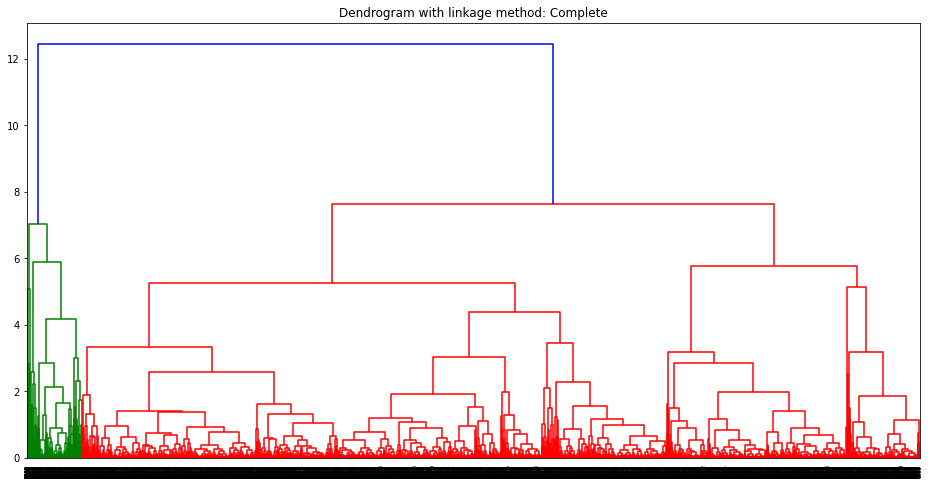

In [ ]:
#plt.figure(figsize=(16,8))
#dendrogram(linkage(X_std, method='complete'))
#plt.show()


plt.figure(figsize=(16,8))
plt.title("Dendrogram with linkage method: ward")
dendrogram(linkage(X_pca, method='ward'))
plt.show()

plt.figure(figsize=(16,8))
plt.title("Dendrogram with linkage method: average")
dendrogram(linkage(X_pca, method='average'))
plt.show()

plt.figure(figsize=(16,8))
plt.title("Dendrogram with linkage method: Complete")
dendrogram(linkage(X_pca, method='complete'))
plt.show()

Dendrograms validated that Wards Method produced the best result with 4 cluster

DBSCAN Approach

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
# Defining the agglomerative clustering
dbscan_cluster = DBSCAN(eps=1, min_samples=5)

# Fit model
clusters = dbscan_cluster.fit_predict(X_pca)

In [ ]:
print("The silhouette score of the DBSCAN solution: {}"
      .format(metrics.silhouette_score(X_pca, clusters, metric='euclidean')))

The silhouette score of the DBSCAN solution: 0.6635084256700285


In [ ]:
dbscan_cluster = DBSCAN(eps=1, min_samples=5, metric="euclidean")

# Fit model
clusters = dbscan_cluster.fit_predict(X_pca)

print("Number of clusters when min_samples=1 is: {}".format(len(np.unique(clusters))))

min_samples_list = range(2,51)

for i in range(2,51):
    dbscan_cluster = DBSCAN(eps=1, min_samples=i, metric="euclidean")
    # Fit model
    clusters = dbscan_cluster.fit_predict(X_pca)
    print("Number of clusters when min_samples={} is: {}".format(i, len(np.unique(clusters))))

Number of clusters when min_samples=1 is: 2
Number of clusters when min_samples=2 is: 2
Number of clusters when min_samples=3 is: 2
Number of clusters when min_samples=4 is: 2
Number of clusters when min_samples=5 is: 2
Number of clusters when min_samples=6 is: 2
Number of clusters when min_samples=7 is: 2
Number of clusters when min_samples=8 is: 2
Number of clusters when min_samples=9 is: 2
Number of clusters when min_samples=10 is: 2
Number of clusters when min_samples=11 is: 2
Number of clusters when min_samples=12 is: 2
Number of clusters when min_samples=13 is: 2
Number of clusters when min_samples=14 is: 2
Number of clusters when min_samples=15 is: 2
Number of clusters when min_samples=16 is: 2
Number of clusters when min_samples=17 is: 2
Number of clusters when min_samples=18 is: 2
Number of clusters when min_samples=19 is: 2
Number of clusters when min_samples=20 is: 2
Number of clusters when min_samples=21 is: 2
Number of clusters when min_samples=22 is: 2
Number of clusters 

As the min_samples increases, number of clusters doesn't change

In [ ]:
dbscan_cluster = DBSCAN(eps=1, min_samples=5, metric="euclidean")

# Fit model
clusters = dbscan_cluster.fit_predict(X_pca)

print("Number of clusters when eps=1 is: {}".format(len(np.unique(clusters))))

min_samples_list = range(2,51)

for i in [0.01,0.1,1,2,3,4,5,6,7,8,9,10]:
    dbscan_cluster = DBSCAN(eps=i, min_samples=5, metric="euclidean")
    # Fit model
    clusters = dbscan_cluster.fit_predict(X_pca)
    print("Number of clusters when eps={} is: {}".format(i, len(np.unique(clusters))))

Number of clusters when eps=1 is: 2
Number of clusters when eps=0.01 is: 299
Number of clusters when eps=0.1 is: 52
Number of clusters when eps=1 is: 2
Number of clusters when eps=2 is: 1
Number of clusters when eps=3 is: 1
Number of clusters when eps=4 is: 1
Number of clusters when eps=5 is: 1
Number of clusters when eps=6 is: 1
Number of clusters when eps=7 is: 1
Number of clusters when eps=8 is: 1
Number of clusters when eps=9 is: 1
Number of clusters when eps=10 is: 1


As epsilon increases, number of clusters decreases.

In [ ]:
y_pred = DBSCAN(eps=1, min_samples=5, metric="euclidean").fit_predict(X_pca)

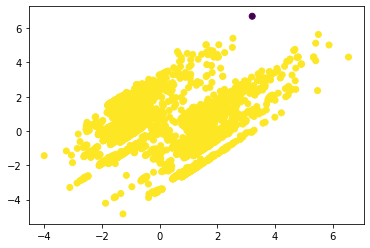

In [ ]:
# Plot the data;
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

Gaussian Mixture Models

In [ ]:
from matplotlib.patches import Ellipse
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture

In [ ]:
# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=4, random_state=123)

# Fit model
clusters = gmm_cluster.fit_predict(X_pca)

In [ ]:
# Defining the clustering
gmm_cluster = GaussianMixture(n_components=4, random_state=123, covariance_type="full")

# Fit model
clusters = gmm_cluster.fit_predict(X_pca)

print("Silhouette score with covariance_type=full: {}".format(
    metrics.silhouette_score(X_pca, clusters, metric='euclidean')))
print("-------------------")

# Defining the clustering
gmm_cluster = GaussianMixture(n_components=4, random_state=123, covariance_type="tied")

# Fit model
clusters = gmm_cluster.fit_predict(X_pca)

print("Silhouette score with covariance_type=tied: {}".format(
    metrics.silhouette_score(X_pca, clusters, metric='euclidean')))
print("-------------------")

# Defining the clustering
gmm_cluster = GaussianMixture(n_components=4, random_state=123, covariance_type="diag")

# Fit model
clusters = gmm_cluster.fit_predict(X_pca)


print("Silhouette score with covariance_type=diag: {}".format(
    metrics.silhouette_score(X_pca, clusters, metric='euclidean')))
print("-------------------")


# Defining the clustering
gmm_cluster = GaussianMixture(n_components=4, random_state=123, covariance_type="spherical")

# Fit model
clusters = gmm_cluster.fit_predict(X_pca)


print("Silhouette score with covariance_type=spherical: {}".format(
    metrics.silhouette_score(X_pca, clusters, metric='euclidean')))

Silhouette score with covariance_type=full: 0.4399488888686251
-------------------
Silhouette score with covariance_type=tied: 0.4598088506612633
-------------------
Silhouette score with covariance_type=diag: 0.44714449515392446
-------------------
Silhouette score with covariance_type=spherical: 0.5274214675224537


Silhouette score of type spherical is the highest among all.

In [ ]:
# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=4, random_state=123, covariance_type="spherical")

# Fit model
y_pred = gmm_cluster.fit_predict(X_pca)

#y_pred = GaussianMixture(n_components=4, covariance_type="spherical")

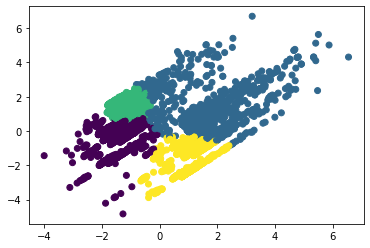

In [ ]:
# Plot the data;
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

**Diensionality Reduction with PCA**

We already applied PCA before.

**Diensionality Reduction with t-SNE**

In [ ]:
from sklearn.manifold import TSNE
import time

In [ ]:
time_start = time.time()
tsne = TSNE(n_components=3, verbose=1, perplexity=80, n_iter=300)
tsne_results = tsne.fit_transform(X_pca)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 241 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.007s...
[t-SNE] Computed neighbors for 10000 samples in 0.487s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.054788
[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.225430
[t-SNE] KL divergence after 300 iterations: 1.088173
t-SNE done! Time elapsed:

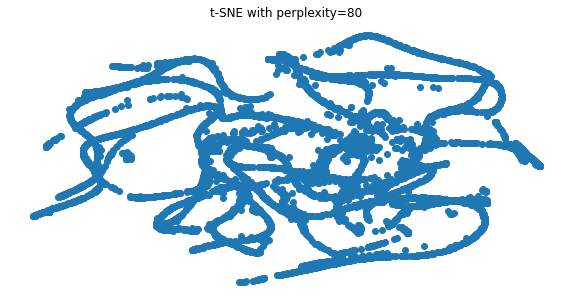

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.title("t-SNE with perplexity=80")
plt.show()

Let's check perplexity= 100 scenario

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.006s...
[t-SNE] Computed neighbors for 10000 samples in 0.701s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.066534
[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.946991
[t-SNE] KL divergence after 300 iterations: 1.001680


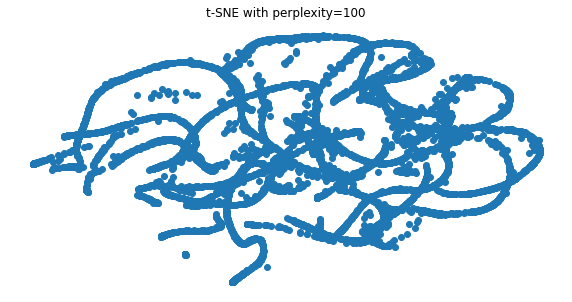

In [ ]:
tsne = TSNE(n_components=3, verbose=1, perplexity=100, n_iter=300)
tsne_results = tsne.fit_transform(X_pca)

plt.figure(figsize=(10,5))
plt.title("t-SNE with perplexity=100")
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

As we increased the perplexity, grouping becomes more apparent.

[t-SNE] Computing 601 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.005s...
[t-SNE] Computed neighbors for 10000 samples in 1.390s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.117900
[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.024315
[t-SNE] KL divergence after 300 iterations: 0.783050


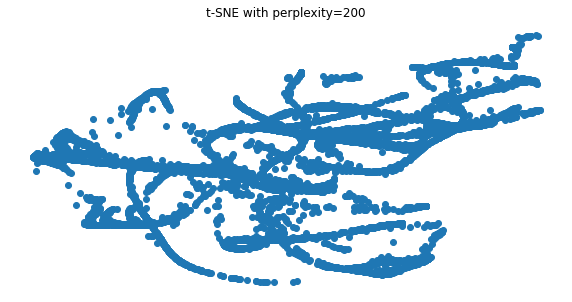

In [ ]:
tsne = TSNE(n_components=3, verbose=1, perplexity=200, n_iter=300)
tsne_results = tsne.fit_transform(X_pca)

plt.figure(figsize=(10,5))
plt.title("t-SNE with perplexity=200")
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

**UMAP**

In [ ]:
!pip install umap-learn


In [ ]:
import umap

In [ ]:
time_start = time.time()

umap_results = umap.UMAP(n_neighbors=3,
                      min_dist=0.1,
                      metric='correlation').fit_transform(X_pca)

print('UMAP done! Time elapsed: {} seconds'.format(time.time()-time_start))

UMAP done! Time elapsed: 25.272249221801758 seconds


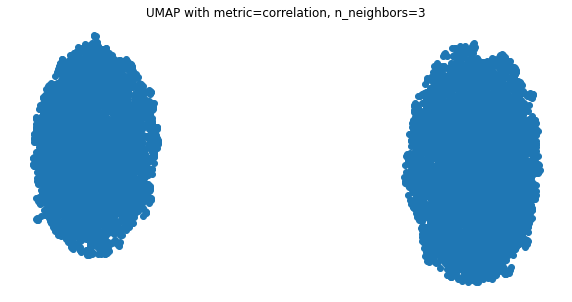

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.title("UMAP with metric=correlation, n_neighbors=3")
plt.axis('off')
plt.show()

In [ ]:
time_start = time.time()

umap_results = umap.UMAP(n_neighbors=5,
                      min_dist=0.1,
                      metric='euclidean').fit_transform(X_pca)

print('UMAP done! Time elapsed: {} seconds'.format(time.time()-time_start))

UMAP done! Time elapsed: 24.200722455978394 seconds


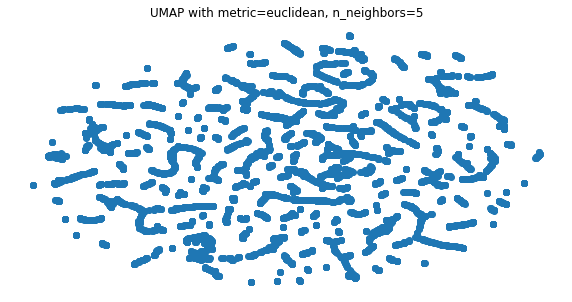

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.title("UMAP with metric=euclidean, n_neighbors=5")
plt.axis('off')
plt.show()

This represents that the data is very disconnected and scattered throughout the space.

In [ ]:
time_start = time.time()

umap_results = umap.UMAP(n_neighbors=2,
                      min_dist=0.1,
                      metric='cosine').fit_transform(X_pca)

print('UMAP done! Time elapsed: {} seconds'.format(time.time()-time_start))

UMAP done! Time elapsed: 22.384541988372803 seconds


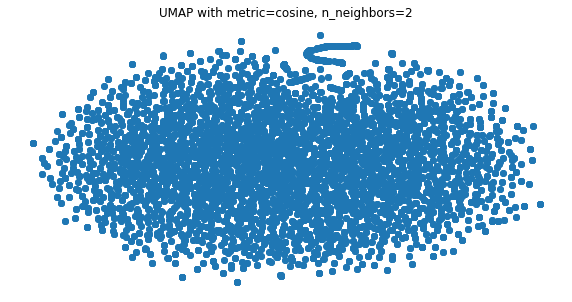

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.title("UMAP with metric=cosine, n_neighbors=2")
plt.axis('off')
plt.show()

In [ ]:
time_start = time.time()

umap_results = umap.UMAP(n_neighbors=3,
                      min_dist=0.1,
                      metric='hamming').fit_transform(X_pca)

print('UMAP done! Time elapsed: {} seconds'.format(time.time()-time_start))

/usr/local/lib/python3.6/dist-packages/umap/umap_.py:1530: UserWarning: gradient function is not yet implemented for hamming distance metric; inverse_transform will be unavailable
  "inverse_transform will be unavailable".format(self.metric)


UMAP done! Time elapsed: 17.188232421875 seconds


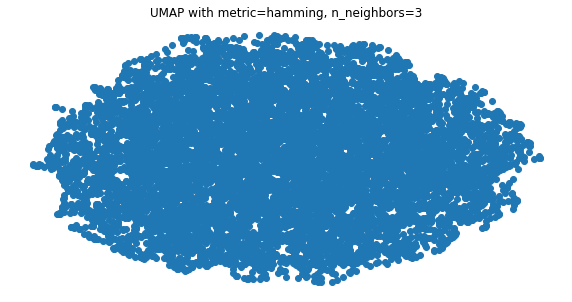

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.title("UMAP with metric=hamming, n_neighbors=3")
plt.axis('off')
plt.show()

**AS A RESULT**

Every single method have same pros and cons. Data quality, number of sample, size of data effect the overall performance of the models.

Based on the given conditions, none of the models I worked with performed very well. However I chose K-mean to move forward due to it's some advantages like; it scales to large dataset, it guarantees convergence, it also generalizes to clusters of different shapes and sizes, such as elliptical clusters. K mean is also relatively simple to implement which saves time. 

Dimensionality Reduction techniques also couldn't reveal very well results which represents that data is very disconnected and scattered throughout the space.

I think result could have been better if data have more numerical and categorical variable (age, sex of customers, product categorization or annual income etc.) and also have no return order which made data very complex and different to deal with.

Thank you!